Este notebook serve unicamente para analisar os datasets da geant utilizados nos experimentos, especialmente no que se refere a dados faltantes

In [1]:
import numpy as np
import pandas as pd
import glob
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar o estilo dos gráficos
sns.set(style="whitegrid")

In [2]:
caminho_para_datasets = "../data/data"

padrao_arquivos = os.path.join(caminho_para_datasets, "*.csv")

# Encontrar todos os arquivos que correspondem ao padrão
lista_arquivos = glob.glob(padrao_arquivos)

if not lista_arquivos:
    print(f"Aviso: Nenhum arquivo .csv encontrado no diretório: '{caminho_para_datasets}'")
else:
    print(f"Total de {len(lista_arquivos)} arquivos .csv encontrados:")
    for f in lista_arquivos:
        print(f" - {os.path.basename(f)}")

Total de 10 arquivos .csv encontrados:
 - esmond data perfsonar-ankara.ulakbim.gov.tr to psmp-gn-bw-lis-pt.geant.org 10-24-2023_6h.csv
 - esmond data perfsonar-ankara.ulakbim.gov.tr to psmp-gn-bw-poz-pl.geant.org 10-24-2023_6h.csv
 - esmond data perfsonar-sonda.rediris.es to psmp-gn-bw-lis-pt.geant.org 10-24-2023_6h.csv
 - esmond data psmall.lut.ac.uk to psmp-gn-bw-vie-at.geant.org 10-24-2023_6h.csv
 - esmond data psmp-gn-bw-lis-pt.geant.org to perfsonar-ankara.ulakbim.gov.tr 10-24-2023_6h.csv
 - esmond data psmp-gn-bw-lis-pt.geant.org to perfsonar.restena.lu 10-24-2023_6h.csv
 - esmond data psmp-gn-bw-poz-pl.geant.org to perfsonar-ankara.ulakbim.gov.tr 10-24-2023_6h.csv
 - esmond data psmp-gn-bw-poz-pl.geant.org to pspmp-anella.csuc.cat 10-24-2023_6h.csv
 - esmond data psmp-gn-bw-vie-at.geant.org to psmall.lut.ac.uk 10-24-2023_6h.csv
 - esmond data pspmp-anella.csuc.cat to psmp-gn-bw-poz-pl.geant.org 10-24-2023_6h.csv


In [3]:
def visualize_time_series(df, value_col, time_col):
    """
    Plota a série temporal, mostrando gaps para NaNs e marcando 
    explicitamente a localização dos NaNs no eixo y=0.
    """
    fig, ax = plt.subplots(figsize=(12, 4))
    
    df_plot = df.copy()

    try:
        df_plot[time_col] = pd.to_datetime(df_plot[time_col])
    except Exception as e:
        print(f"  Aviso: Não foi possível converter '{time_col}' para datetime. O gráfico pode falhar. Erro: {e}")
        return     
    
    # Plotar a linha principal. Onde 'value_col' for NaN, a linha terá um gap.
    ax.plot(df_plot[time_col], df_plot[value_col], lw=1.5, label=value_col)
    
    nan_mask = df_plot[value_col].isna()
    
    if nan_mask.any():
        ax.scatter(
            df_plot.loc[nan_mask, time_col], 
            [0] * nan_mask.sum(),  # Plota os marcadores em y=0
            marker='x', 
            color='red', 
            s=50, 
            label=f'Dados Faltantes',
            zorder=10 # Garante que os marcadores fiquem na frente
        )
    
    ax.set_title(f"Série Temporal: {value_col} (com faltantes)")
    ax.set_xlabel("Tempo")
    ax.set_ylabel(value_col)
    ax.grid(True, alpha=0.3)
    ax.legend() 
    fig.tight_layout()
    plt.show()


Arquivo: esmond data perfsonar-ankara.ulakbim.gov.tr to psmp-gn-bw-lis-pt.geant.org 10-24-2023_6h.csv
Shape do dataset: (714, 2)
Total de células: 1,428
Total de células faltantes (NaN): 177
Porcentagem total de dados faltantes: 12.39%


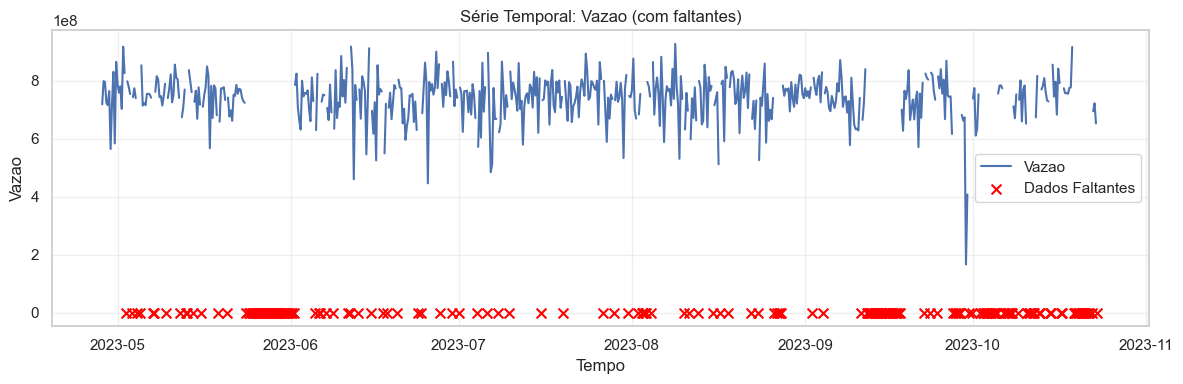

Arquivo: esmond data perfsonar-ankara.ulakbim.gov.tr to psmp-gn-bw-poz-pl.geant.org 10-24-2023_6h.csv
Shape do dataset: (716, 2)
Total de células: 1,432
Total de células faltantes (NaN): 189
Porcentagem total de dados faltantes: 13.20%


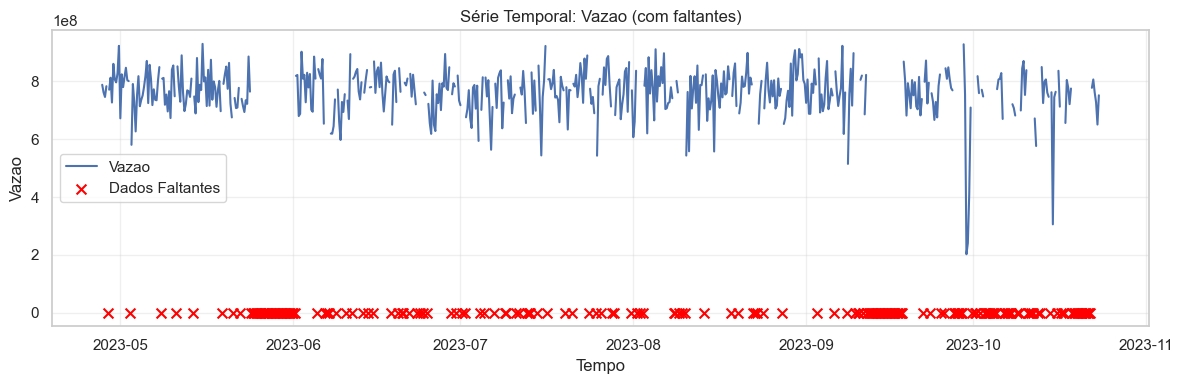

Arquivo: esmond data perfsonar-sonda.rediris.es to psmp-gn-bw-lis-pt.geant.org 10-24-2023_6h.csv
Shape do dataset: (239, 2)
Total de células: 478
Total de células faltantes (NaN): 86
Porcentagem total de dados faltantes: 17.99%


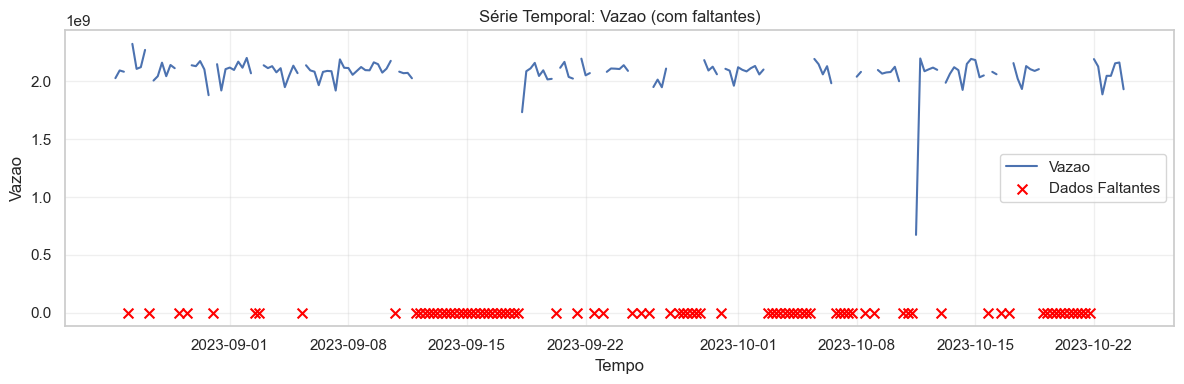

Arquivo: esmond data psmall.lut.ac.uk to psmp-gn-bw-vie-at.geant.org 10-24-2023_6h.csv
Shape do dataset: (720, 2)
Total de células: 1,440
Total de células faltantes (NaN): 232
Porcentagem total de dados faltantes: 16.11%


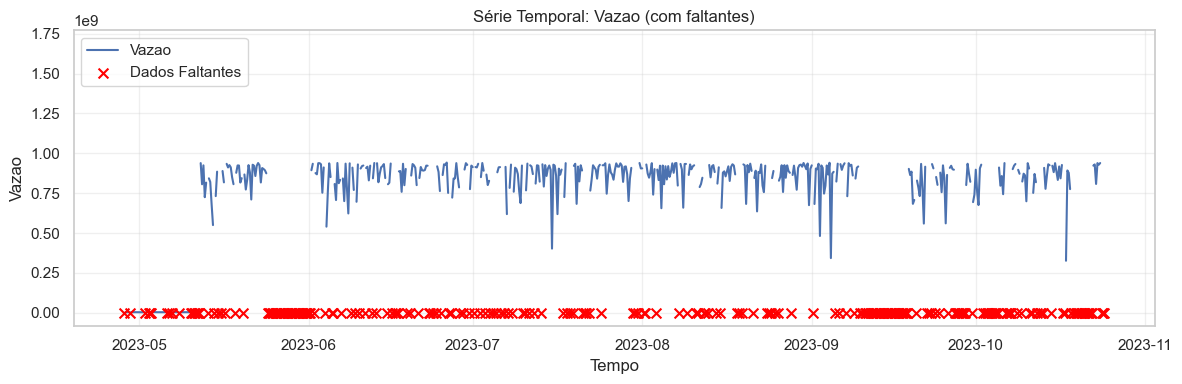

Arquivo: esmond data psmp-gn-bw-lis-pt.geant.org to perfsonar-ankara.ulakbim.gov.tr 10-24-2023_6h.csv
Shape do dataset: (716, 2)
Total de células: 1,432
Total de células faltantes (NaN): 134
Porcentagem total de dados faltantes: 9.36%


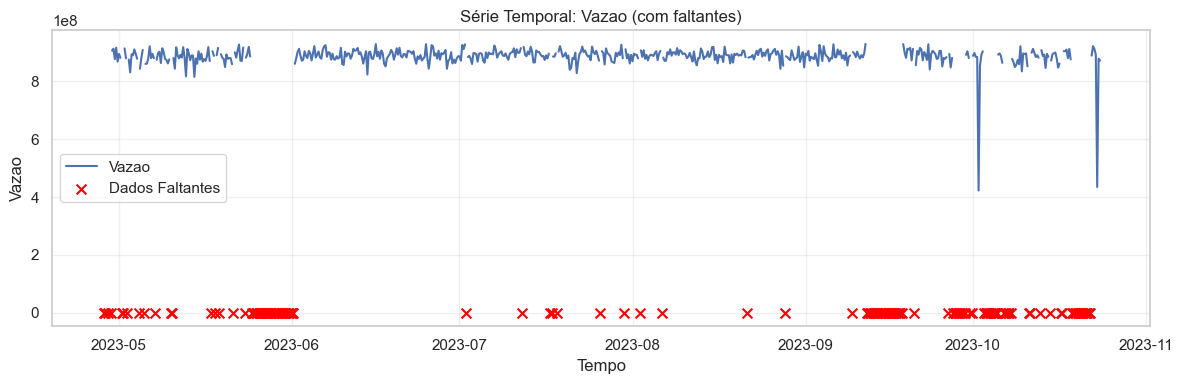

Arquivo: esmond data psmp-gn-bw-lis-pt.geant.org to perfsonar.restena.lu 10-24-2023_6h.csv
Shape do dataset: (716, 2)
Total de células: 1,432
Total de células faltantes (NaN): 144
Porcentagem total de dados faltantes: 10.06%


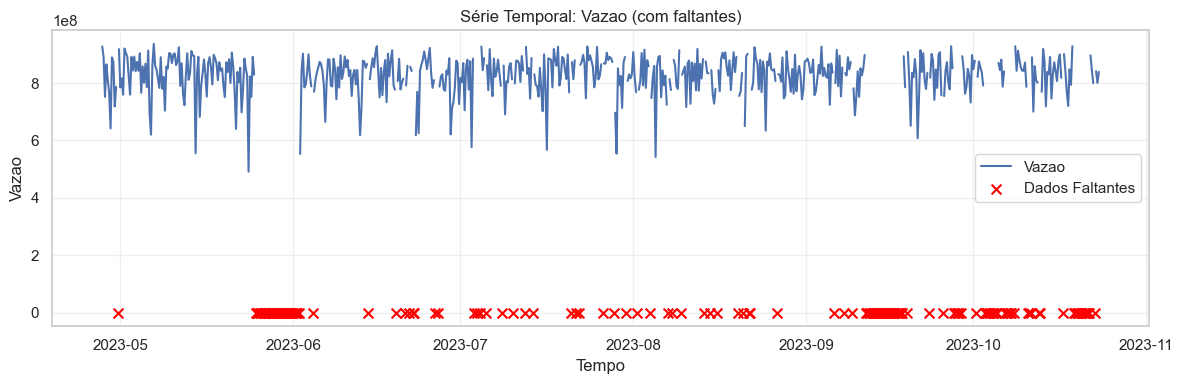

Arquivo: esmond data psmp-gn-bw-poz-pl.geant.org to perfsonar-ankara.ulakbim.gov.tr 10-24-2023_6h.csv
Shape do dataset: (716, 2)
Total de células: 1,432
Total de células faltantes (NaN): 124
Porcentagem total de dados faltantes: 8.66%


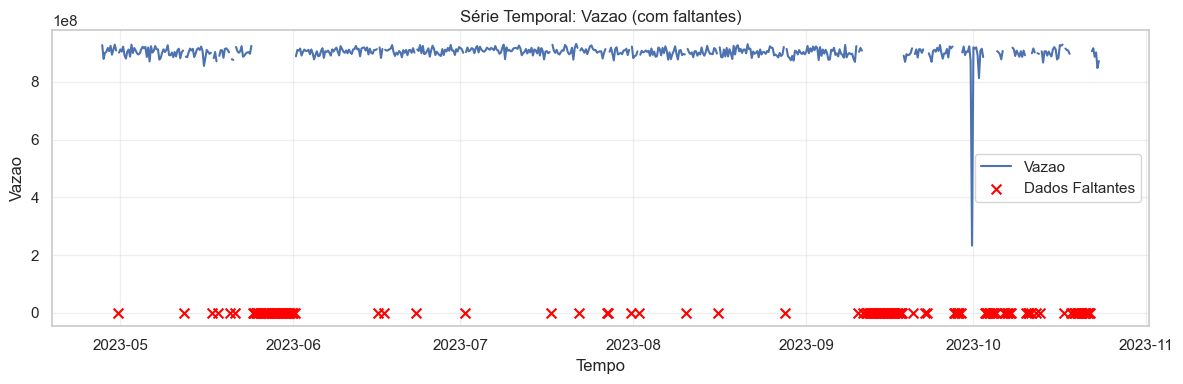

Arquivo: esmond data psmp-gn-bw-poz-pl.geant.org to pspmp-anella.csuc.cat 10-24-2023_6h.csv
Shape do dataset: (717, 2)
Total de células: 1,434
Total de células faltantes (NaN): 106
Porcentagem total de dados faltantes: 7.39%


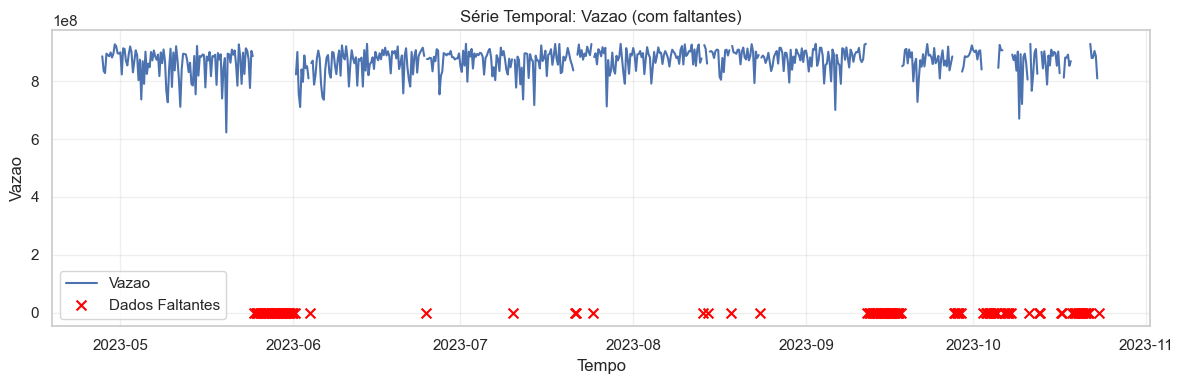

Arquivo: esmond data psmp-gn-bw-vie-at.geant.org to psmall.lut.ac.uk 10-24-2023_6h.csv
Shape do dataset: (720, 2)
Total de células: 1,440
Total de células faltantes (NaN): 134
Porcentagem total de dados faltantes: 9.31%


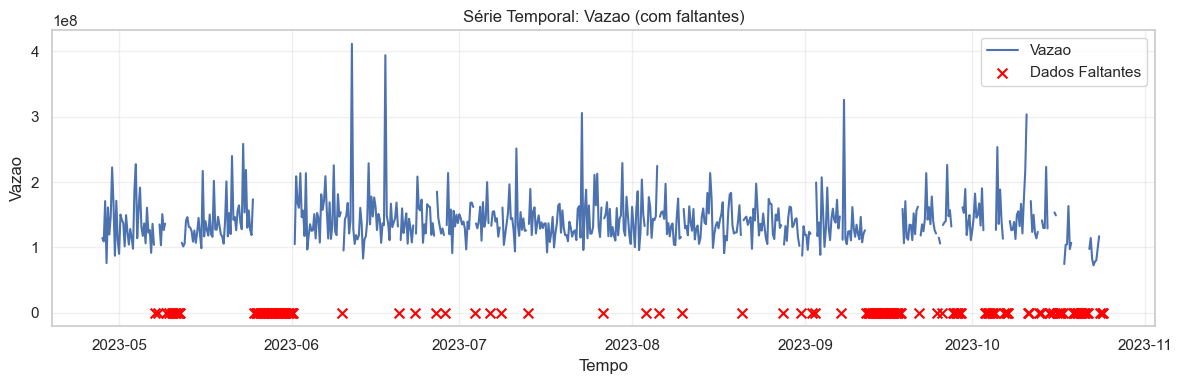

Arquivo: esmond data pspmp-anella.csuc.cat to psmp-gn-bw-poz-pl.geant.org 10-24-2023_6h.csv
Shape do dataset: (716, 2)
Total de células: 1,432
Total de células faltantes (NaN): 270
Porcentagem total de dados faltantes: 18.85%


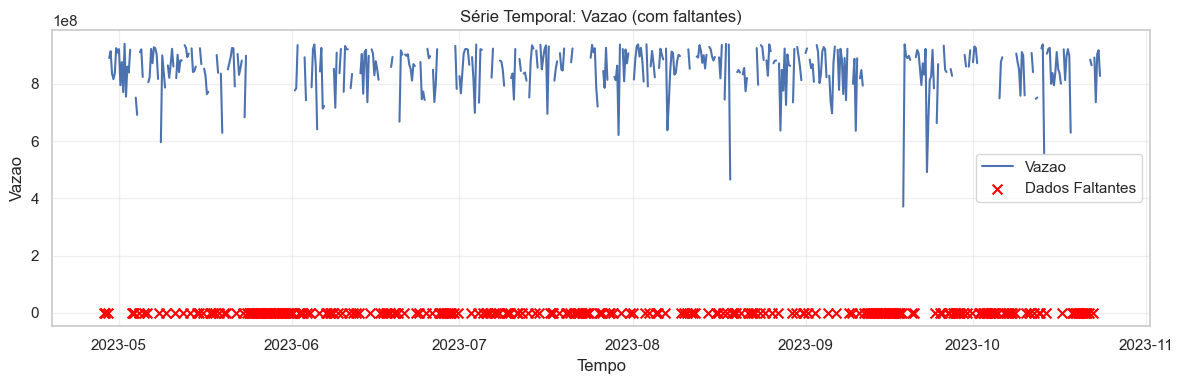

In [4]:
# Lista para armazenar os resultados para o resumo final
resultados_gerais = []

for arquivo in lista_arquivos:
    nome_arquivo = os.path.basename(arquivo)
    print(f"Arquivo: {nome_arquivo}")

    try:
        df = pd.read_csv(arquivo)
        
        if df.empty:
            print("O arquivo está vazio.")
            resultados_gerais.append({
                'Arquivo': nome_arquivo, 
                'Percentual Faltante Total': 0, 
                'Status': 'Vazio'
            })
            continue

        total_celulas = df.size
        total_faltantes = df.isnull().sum().sum()
        percent_faltante_total = (total_faltantes / total_celulas) * 100
        
        print(f"Shape do dataset: {df.shape}")
        print(f"Total de células: {total_celulas:,}")
        print(f"Total de células faltantes (NaN): {total_faltantes:,}")
        print(f"Porcentagem total de dados faltantes: {percent_faltante_total:.2f}%")
        
        resultados_gerais.append({
            'Arquivo': nome_arquivo, 
            'Quantidade de Amostras': total_celulas,
            'Percentual Faltante Total': percent_faltante_total, 
            'Quantidade Faltante Total': total_faltantes, 
            'Status': 'OK'
        })

        visualize_time_series(df, "Vazao", "Data")

    except Exception as e:
        print(f"ERRO: Não foi possível processar o arquivo {nome_arquivo}. Motivo: {e}")
        resultados_gerais.append({
            'Arquivo': nome_arquivo, 
            'Percentual Faltante Total': None, 
            'Status': f'Erro de Leitura: {e}'
        })

In [5]:
if not resultados_gerais:
    print("Nenhum resultado para resumir.")
else:
    df_resumo = pd.DataFrame(resultados_gerais)
    
    print("RESUMO GERAL DA ANÁLISE DE DADOS FALTANTES\n")
    
    print(df_resumo.to_string(index=False))
    
    media_total = df_resumo[df_resumo['Status'] == 'OK']['Percentual Faltante Total'].mean()
    
    print("\n" + "-"*80)
    print(f"Média de dados faltantes (em todos os datasets 'OK'): {media_total:.2f}%")
    print("-"*80)

RESUMO GERAL DA ANÁLISE DE DADOS FALTANTES

                                                                                     Arquivo  Quantidade de Amostras  Percentual Faltante Total  Quantidade Faltante Total Status
esmond data perfsonar-ankara.ulakbim.gov.tr to psmp-gn-bw-lis-pt.geant.org 10-24-2023_6h.csv                    1428                  12.394958                        177     OK
esmond data perfsonar-ankara.ulakbim.gov.tr to psmp-gn-bw-poz-pl.geant.org 10-24-2023_6h.csv                    1432                  13.198324                        189     OK
     esmond data perfsonar-sonda.rediris.es to psmp-gn-bw-lis-pt.geant.org 10-24-2023_6h.csv                     478                  17.991632                         86     OK
               esmond data psmall.lut.ac.uk to psmp-gn-bw-vie-at.geant.org 10-24-2023_6h.csv                    1440                  16.111111                        232     OK
esmond data psmp-gn-bw-lis-pt.geant.org to perfsonar-ankara.ulakbi

Verificar range dos dados para calcular FAM (Fuzzy Accuracy Metric) na avaliação da imputação e da predição

In [ ]:
import pandas as pd
import os

# Lista para armazenar os resultados para o resumo final
resultados_gerais = []

for arquivo in lista_arquivos:
    nome_arquivo = os.path.basename(arquivo)

    try:
        df = pd.read_csv(arquivo)
        
        if df.empty:
            print("O arquivo está vazio.")
            resultados_gerais.append({
                'Arquivo': nome_arquivo,
                'Quantidade de Amostras': 0,
                'Min Vazao': None,
                'Max Vazao': None,
                'Status': 'Vazio'
            })
            continue

        total_celulas = df.size
        
        if 'Data' in df.columns and 'Vazao' in df.columns:
            # Converte a coluna 'Data' para datetime para obter min/max corretamente
            df['Data'] = pd.to_datetime(df['Data'])
            
            min_data = df['Data'].min()
            max_data = df['Data'].max()
            
            # Remove NaNs da coluna 'Vazao' antes de calcular min/max
            min_vazao = df['Vazao'].dropna().min()
            max_vazao = df['Vazao'].dropna().max()
            

        else:
            print("ERRO: Colunas 'Data' ou 'Vazao' não encontradas.")
            raise KeyError("Colunas 'Data' ou 'Vazao' ausentes.")
        
        resultados_gerais.append({
            'Arquivo': nome_arquivo, 
            'Min Vazao': min_vazao,
            'Max Vazao': max_vazao,
            'Status': 'OK'
        })


    except Exception as e:
        print(f"ERRO: Não foi possível processar o arquivo {nome_arquivo}. Motivo: {e}")
        resultados_gerais.append({
            'Arquivo': nome_arquivo, 
            'Min Vazao': None,
            'Max Vazao': None,
            'Status': f'Erro: {e}'
        })

print("\n\n===========================================")
print("--- Resumo Geral da Análise ---")
print("===========================================")

if not resultados_gerais:
    print("Nenhum arquivo foi processado.")
else:
    # Converte a lista de resultados em um DataFrame para fácil manipulação
    df_resultados = pd.DataFrame(resultados_gerais)
    
    # Exibir o DataFrame de resultados completo
    print("Resultados detalhados por arquivo:")
    pd.set_option('display.max_columns', None)
    pd.set_option('display.width', 1000)
    print(df_resultados.to_string(index=False))
    
    # Calcular médias apenas dos arquivos processados com 'OK'
    df_validos = df_resultados[df_resultados['Status'] == 'OK']
    
    if not df_validos.empty:
        media_min_vazao = df_validos['Min Vazao'].mean()
        media_max_vazao = df_validos['Max Vazao'].mean()

        vazao_max = df_validos['Max Vazao'].max()
        vazao_min = df_validos['Min Vazao'].min()
        
        print("\n--- Médias dos Datasets Válidos ('OK') ---")
        print(f"Média da Vazão Mínima: {media_min_vazao:.2f}")
        print(f"Média da Vazão Máxima: {media_max_vazao:.2f}")
        print(f"Tamanho máximo de Vazão encontrado: {vazao_max:.4f}")
        print(f"Tamanho mínimo de Vazão encontrado: {vazao_min:.4f}")

    else:
        print("\nNenhum dataset foi processado com sucesso para calcular as médias.")


--- Processando Arquivo: esmond data perfsonar-ankara.ulakbim.gov.tr to psmp-gn-bw-lis-pt.geant.org 10-24-2023_6h.csv ---

--- Processando Arquivo: esmond data perfsonar-ankara.ulakbim.gov.tr to psmp-gn-bw-poz-pl.geant.org 10-24-2023_6h.csv ---

--- Processando Arquivo: esmond data perfsonar-sonda.rediris.es to psmp-gn-bw-lis-pt.geant.org 10-24-2023_6h.csv ---

--- Processando Arquivo: esmond data psmall.lut.ac.uk to psmp-gn-bw-vie-at.geant.org 10-24-2023_6h.csv ---

--- Processando Arquivo: esmond data psmp-gn-bw-lis-pt.geant.org to perfsonar-ankara.ulakbim.gov.tr 10-24-2023_6h.csv ---

--- Processando Arquivo: esmond data psmp-gn-bw-lis-pt.geant.org to perfsonar.restena.lu 10-24-2023_6h.csv ---

--- Processando Arquivo: esmond data psmp-gn-bw-poz-pl.geant.org to perfsonar-ankara.ulakbim.gov.tr 10-24-2023_6h.csv ---

--- Processando Arquivo: esmond data psmp-gn-bw-poz-pl.geant.org to pspmp-anella.csuc.cat 10-24-2023_6h.csv ---

--- Processando Arquivo: esmond data psmp-gn-bw-vie-at.g